In [56]:
from deathbeds.___018_08_25_Moving_github_data_into_dataframes import pulls, issues
from deathbeds.___018_08_28_A_dataframe_to_explain_models import FramePipe
from matplotlib.pyplot import *
import pandas, numpy as np
%matplotlib inline



use the number of comments

In [57]:
df = pandas.concat(
    list(issues('jupyterlab/jupyterlab', iter=58))
)
times = [object for object in df.columns if object.endswith('_at')]
df[times] = df[times].applymap(pandas.to_datetime)
df = df.set_index('created_at')

## Number of pull requests per week and month.

In [58]:
weekly, monthly = pandas.Grouper(freq='W'), pandas.Grouper(freq='M')

In [59]:
dt = (df['closed_at']-df.index).rename('delta')

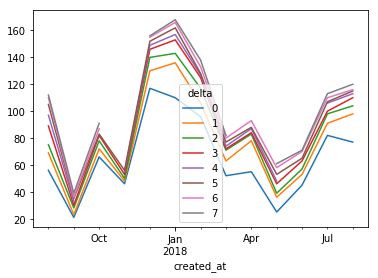

In [60]:
days = dt.apply(lambda x: x.days)

days.groupby(pandas.Grouper(freq='M')).value_counts().unstack(-1)[list(range(8))].cumsum(axis=1).plot()

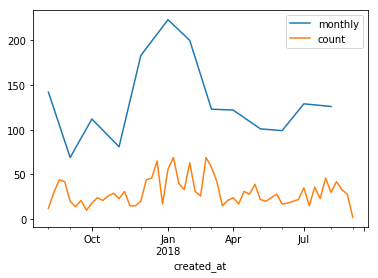

In [61]:
ax = dt.groupby(monthly).describe()['count'].rename('monthly').plot(legend=True)
dt.groupby(weekly).describe()['count'].plot(ax=ax, legend=True)

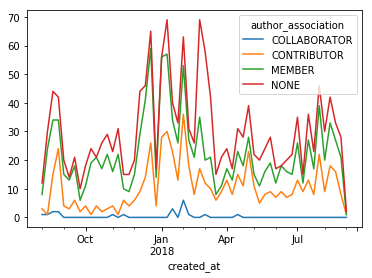

In [62]:
association = df.author_association.groupby(weekly).value_counts().unstack(-1).fillna(0)
association.cumsum(axis=1).plot()

    from deathbeds.__github_data_into_dataframes import get

    from requests_cache import install_cache
    install_cache("jlpulls")

    r=get('https://api.github.com/repos/jupyterlab/jupyterlab/issues/5230/comments')

    import requests

In [63]:
T = pandas.concat([
    dt.apply(lambda x: pandas.np.array(x.components) * pandas.np.array((24, 1, 1/60, 1/60**2, 0, 0, 0))).apply(sum).rename('hours'), df.loc[dt.index].comments], axis=1)

In [65]:
g = T.groupby(weekly)

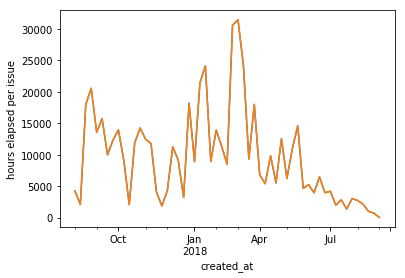

In [66]:
g.sum().hours.plot(); gca().set_ylabel('hours elapsed per issue'); g.sum().hours.plot(); 

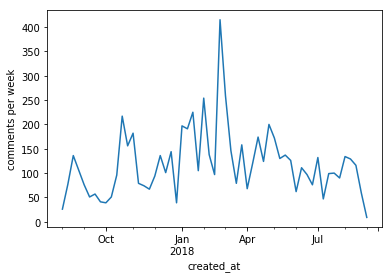

In [67]:
g.sum().comments.plot(); gca().set_ylabel('comments per week');

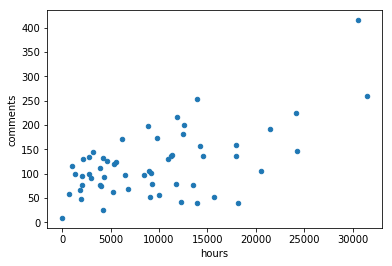

In [53]:
g.sum().plot.scatter('hours', 'comments')

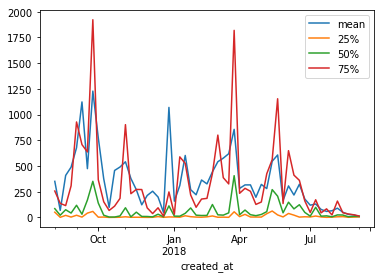

In [72]:
g.describe().hours[['mean', '25%', '50%', '75%']].plot()

In [74]:
g.describe()

hours                                                             \
           count         mean          std       min        25%         50%   
created_at                                                                    
2017-08-06  12.0   351.417500   830.243237  0.020000  51.566042   86.204583   
2017-08-13  30.0    69.438694    89.799468  0.048889   1.659444   22.134306   
2017-08-20  44.0   409.012273   945.122250  0.138333  20.528611   75.436944   
2017-08-27  42.0   489.486111   927.169952  0.138611   4.087222   43.044444   
2017-09-03  20.0   677.975111  1136.418633  0.806667  21.738889  118.827778   
2017-09-10  14.0  1123.365734  2148.841358  0.503056   3.930694   31.907778   
2017-09-17  21.0   474.879616   734.936645  0.088889  42.533056  169.573056   
2017-09-24  10.0  1228.815861  1724.345758  0.500278  59.021944  351.692917   
2017-10-01  18.0   774.567978  1799.647933  0.220000   3.099306  140.624028   
2017-10-08  24.0   377.225394  1317.391478  0.043056   4.341181   22.444028   
2017-10-15  21.0    98.364894   210.494735  0.065278   0.745556    4.434444   
2017-10-22  26.0   457.205459  1279.763297  0.355000   1.406458    4.372917   
2017-10-29  29.0   490.716398  1164.632144  0.373333   2.401944   15.208333   
2017-11-05  23.0   541.700495   778.233812  0.376667   6.841389   94.507500   
2017-11-12  31.0   379.156425  1053.436514  0.003889   1.989861    5.984167   
2017-11-19  15.0   270.431111   484.142825  0.333889   2.471528   51.719444   
2017-11-26  15.0   123.282722   163.951259  0.163611   1.819583   10.220833   
2017-12-03  20.0   213.854208   561.925019  0.068611   1.019583    9.715278   
2017-12-10  44.0   255.561086   852.258070  0.019444   1.831806    5.954861   
2017-12-17  46.0   198.973853   728.023827  0.777778   8.773611   31.938333   
2017-12-24  65.0    49.308923   191.899791  0.002222   1.742500    5.988889   
2017-12-31  17.0  1070.200931  1895.593124  0.203056   5.379722  112.882500   
2018-01-07  56.0   158.561572   612.530257  0.158333   4.615625   13.025972   
2018-01-14  69.0   310.601176   549.441368  0.190833   2.544722   12.524167   
2018-01-21  40.0   603.128757  1224.014561  0.188333  16.685556   40.302222   
2018-01-28  33.0   270.163325   378.809206  0.005833   7.664167   92.736667   
2018-02-04  63.0   220.723298   580.516575  0.005556   3.985556   22.604167   
2018-02-11  31.0   364.476129   727.849595  0.151667   2.583611   19.318889   
2018-02-18  26.0   326.653109   857.569768  0.043056   6.207708   20.162639   
2018-02-25  69.0   443.344473   724.594838  0.004722  14.942778  126.013333   
2018-03-04  58.0   542.402107   971.257807  0.063056   2.251806   25.774583   
2018-03-11  42.0   576.821971  1090.022335  0.360833   3.183472   22.851389   
2018-03-18  15.0   620.164852  1087.079946  0.067500   1.635556   45.020000   
2018-03-25  21.0   856.910569  1080.843230  6.067500  55.310000  406.563333   
2018-04-01  24.0   282.294745   754.987831  0.677500   8.597083   26.718333   
2018-04-08  17.0   316.794869   611.057387  0.002222  30.348889   72.230833   
2018-04-15  31.0   316.860663   661.532393  0.400278   4.605000   26.972778   
2018-04-22  28.0   196.613641   418.521938  0.635833   4.423681   17.546667   
2018-04-29  39.0   321.675335   732.955926  0.285556   3.878056   29.355556   
2018-05-06  22.0   281.083157   423.870923  0.149722  36.776597   56.791667   
2018-05-13  20.0   546.573861   752.033585  0.640000  62.859444  271.055417   
2018-05-20  24.0   607.740150   761.394471  1.063333  24.834583  207.071111   
2018-05-27  28.0   166.147698   342.477856  0.026667   5.463750   45.390833   
2018-06-03  17.0   306.869788   312.219042  1.481389  39.177500  148.622500   
2018-06-10  18.0   218.260710   266.867725  1.790833  22.929236   83.633056   
2018-06-17  20.0   323.218583   476.350656  0.765278   3.793542  124.102083   
2018-06-24  22.0   179.361856   331.959911  0.016667   7.012569   49.498333   
2018-07-01  35.0   119.525810   238.133480  0.098333   4.9247

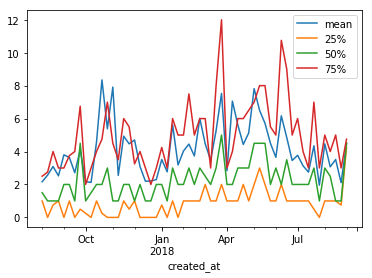

In [75]:
g.describe().comments[['mean', '25%', '50%', '75%']].plot()

In [79]:
import seaborn as sns

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


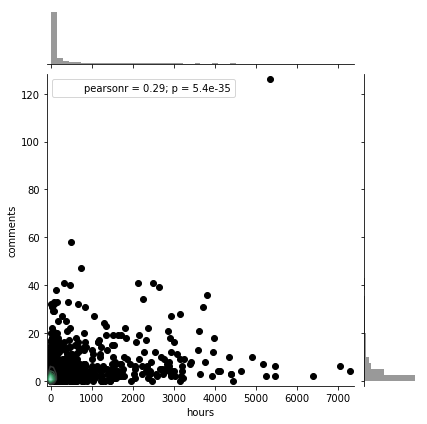

In [92]:
sns.jointplot(s.hours, s.comments, color="k").plot_joint(sns.kdeplot, color='w', zorder=100, n_levels=11)

In [117]:
df[df.apply(lambda x: x.loc['comments'] > 15 and T.loc[x.name].loc['hours'] < 24, axis=1)]

,assignee,assignees,author_association,body,closed_at,comments,comments_url,events_url,html_url,id,...,milestone,node_id,number,pull_request,repository_url,state,title,updated_at,url,user
created_at,,,,,,,,,,,,,,,,,,,,,
2018-08-18 10:40:41,None,[],NONE,I get this error:\r\n````\r\n\r\nC:\WinP\bd36\...,2018-08-18 13:01:52,32,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/issue...,351810569,...,{'url': 'https://api.github.com/repos/jupyterl...,MDU6SXNzdWUzNTE4MTA1Njk=,5155,NaN,https://api.github.com/repos/jupyterlab/jupyte...,closed,trying to install jupyterlab-0.34.0rc2,2018-08-18 13:01:52,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'stonebig', 'id': 4312421, 'node_id'..."
2018-07-17 12:39:45,None,[],NONE,"hi Team,\r\n\r\nIm loving jupyterlab.\r\ngot s...",2018-07-18 05:19:21,18,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/issue...,341901518,...,{'url': 'https://api.github.com/repos/jupyterl...,MDU6SXNzdWUzNDE5MDE1MTg=,4917,NaN,https://api.github.com/repos/jupyterlab/jupyte...,closed,need help with importing a library geopy [jupy...,2018-07-18 05:46:30,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'AmulPatil', 'id': 34025731, 'node_i..."
2017-11-20 06:57:35,None,[],NONE,With a simple\r\n\r\n```python\r\nfrom ipywidg...,2017-11-20 17:10:50,16,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/issue...,275254156,...,{'url': 'https://api.github.com/repos/jupyterl...,MDU6SXNzdWUyNzUyNTQxNTY=,3263,NaN,https://api.github.com/repos/jupyterlab/jupyte...,closed,Widgets not showing in v0.29.2,2017-12-15 09:10:11,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'michaelaye', 'id': 69774, 'node_id'..."
2017-10-17 11:52:07,None,[],NONE,"I just upgraded to latest version using pip, a...",2017-10-17 13:26:05,17,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/issue...,266095233,...,{'url': 'https://api.github.com/repos/jupyterl...,MDU6SXNzdWUyNjYwOTUyMzM=,3105,NaN,https://api.github.com/repos/jupyterlab/jupyte...,closed,"JupyterLab assets not detected in ""/usr/share/...",2017-12-29 14:06:47,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'CptanPanic', 'id': 4087170, 'node_i..."
2017-10-13 20:51:26,None,[],MEMBER,Only attempt to load source maps for top level...,2017-10-13 21:34:37,20,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/pull/...,265415469,...,{'url': 'https://api.github.com/repos/jupyterl...,MDExOlB1bGxSZXF1ZXN0MTQ2NTUxOTA5,3093,{'url': 'https://api.github.com/repos/jupyterl...,https://api.github.com/repos/jupyterlab/jupyte...,closed,Clean up source map loader,2017-10-23 20:53:06,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'blink1073', 'id': 2096628, 'node_id..."


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


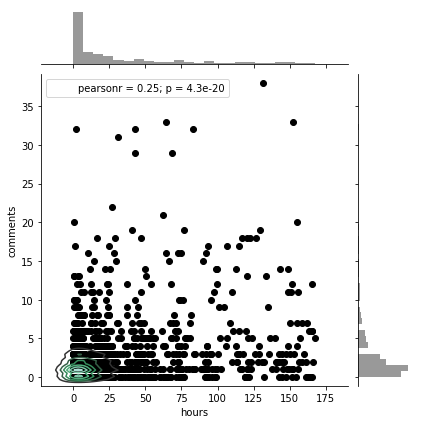

In [96]:
_ = s[s.hours<7*24]
sns.jointplot(_.hours, _.comments, color="k").plot_joint(sns.kdeplot, color='w', zorder=100, n_levels=6)

In [118]:
tags = (
    df.labels.apply(pandas.Series)
    .stack()
    .apply(pandas.Series)['name']
    .pipe(pandas.get_dummies)
    .reset_index('created_at').groupby('created_at').sum().groupby(weekly).sum()
)

Ranked similarities between tags

In [119]:
correlations = tags.corr()

relationships = pandas.DataFrame(pandas.np.argsort(correlations.values, axis=0)[::-1], columns=tags.columns).apply(tags.columns.__getitem__)

In [120]:
pandas.concat([
    relationships['status:Wont Fix'].to_frame('😡').T,
    relationships['status:Wont Fix'].apply(correlations.loc['status:Wont Fix'].__getitem__).to_frame('😡').T
])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
😡,status:Wont Fix,tag:Build System,tag:Phosphor,tag:Server Change,type:Question,tag:Extensions,type:Bug,status:Needs Discussion,pkg:rendermime,pkg:codemirror,...,pkg:completer,good first issue,pkg:docregistry,pkg:apputils,pkg:launcher,pkg:docmanager,pkg:filebrowser,pkg:services,tag:Design and UX,pkg:application
😡,1,0.501965,0.486423,0.430946,0.32651,0.246494,0.175977,0.150312,0.126075,0.0379078,...,-0.0781209,-0.0826904,-0.0846884,-0.0869825,-0.0873521,-0.0936634,-0.094353,-0.0947106,-0.0982714,-0.102679


In [121]:
relationships

,good first issue,greenkeeper,help wanted,pkg:application,pkg:apputils,pkg:cells,pkg:codeeditor,pkg:codemirror,pkg:completer,pkg:console,...,tag:Real Time Collaboration,tag:Search and Replace,tag:Server Change,tag:Settings,todo:Backport to 0.32.x,type:Bug,type:Enhancement,type:Feedback,type:Maintenance,type:Question
0,good first issue,greenkeeper,help wanted,pkg:application,pkg:apputils,pkg:cells,pkg:codeeditor,pkg:codemirror,pkg:completer,pkg:console,...,tag:Real Time Collaboration,tag:Search and Replace,tag:Server Change,tag:Settings,todo:Backport to 0.32.x,type:Bug,type:Enhancement,type:Feedback,type:Maintenance,type:Question
1,status:Needs Review,tag:Search and Replace,status:Work in Progress,pkg:fileeditor,tag:Documentation,pkg:docregistry,pkg:coreutils,tag:Documentation,pkg:console,pkg:running,...,tag:Build System,status:Duplicate,tag:Build System,pkg:console,pkg:completer,pkg:notebook,tag:Design and UX,pkg:cells,tag:Extensions,tag:Search and Replace
2,pkg:imageviewer,status:Duplicate,tag:Browser Compatibility,pkg:services,pkg:vega,status:Needs Info,pkg:csvviewer,pkg:vega,pkg:notebook,pkg:completer,...,help wanted,greenkeeper,status:Wont Fix,pkg:notebook,pkg:codemirror,tag:Design and UX,pkg:notebook,status:Needs Info,tag:Build System,tag:Extensions
3,type:Feedback,type:Question,tag:Extensions,pkg:themes,pkg:coreutils,type:Feedback,pkg:shortcuts,pkg:tooltip,type:Bug,pkg:notebook,...,tag:Extensions,type:Question,tag:Extensions,pkg:apputils,status:Needs Discussion,pkg:filebrowser,pkg:console,pkg:outputarea,tag:Examples,status:Duplicate
4,pkg:extensionmanager,pkg:outputarea,pkg:json,tag:Design and UX,pkg:completer,tag:Documentation,pkg:docregistry,pkg:codeeditor,pkg:apputils,pkg:themes,...,tag:Browser Compatibility,pkg:outputarea,type:Bug,type:Enhancement,pkg:terminal,tag:Build System,pkg:themes,good first issue,type:Enhancement,status:Wont Fix
5,pkg:settingeditor,pkg:shortcuts,tag:Real Time Collaboration,pkg:console,tag:Search and Replace,pkg:apputils,pkg:codemirror,pkg:launcher,pkg:help,type:Enhancement,...,pkg:running,pkg:shortcuts,type:Maintenance,pkg:completer,pkg:launcher,pkg:completer,pkg:running,pkg:docmanager,pkg:cells,tag:Build System
6,pkg:markdownviewer,pkg:services,tag:Backwards compatible,type:Bug,pkg:cells,pkg:docmanager,pkg:outputarea,tag:Browser Compatibility,tag:Documentation,tag:Design and UX,...,status:Needs Discussion,pkg:apputils,type:Question,tag:Search and Replace,pkg:console,pkg:help,pkg:fileeditor,pkg:fileeditor,tag:Design and UX,status:Needs Info
7,tag:Performance,pkg:apputils,status:Needs Info,pkg:docmanager,pkg:docregistry,type:Bug,pkg:inspector,pkg:inspector,pkg:vega,pkg:mainmenu,...,pkg:console,pkg:coreutils,pkg:launcher,tag:Browser Compatibility,tag:Documentation,pkg:docregistry,pkg:mainmenu,type:Bug,type:Bug,greenkeeper
8,status:Needs Info,pkg:inspector,tag:Examples,type:Enhancement,tag:Settings,pkg:filebrowser,tag:Search and Replace,pkg:themes,pkg:faq,type:Bug,...,pkg:codemirror,pkg:inspector,pkg:themes,pkg:coreutils,pkg:iframe,pkg:console,type:Bug,pkg:docregistry,pkg:notebook,tag:Server Change
9,pkg:shortcuts,pkg:coreutils,tag:Build System,pkg:running,status:Duplicate,type:Maintenance,pkg:tabmanager,pkg:docregistry,tag:Settings,pkg:fileeditor,...,type:Maintenance,pkg:codeeditor,tag:Design and UX,pkg:running,pkg:tabmanager,pkg:fileeditor,pkg:vega,pkg:settingeditor,pkg:vega,pkg:outputarea


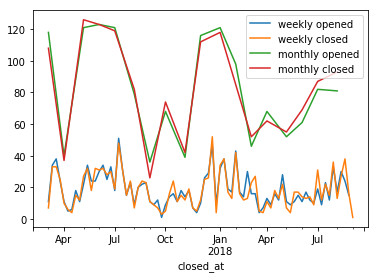

In [8]:
ax = df.set_index('created_at')['id'].rename('weekly opened').groupby(pandas.Grouper(freq='W')).count().plot(legend=True)
df.set_index('closed_at')['id'].rename('weekly closed').groupby(pandas.Grouper(freq='W')).count().plot(ax=ax, legend=True)
df.set_index('created_at')['id'].rename('monthly opened').groupby(pandas.Grouper(freq='M')).count().plot(legend=True)
df.set_index('closed_at')['id'].rename('monthly closed').groupby(pandas.Grouper(freq='M')).count().plot(ax=ax, legend=True)

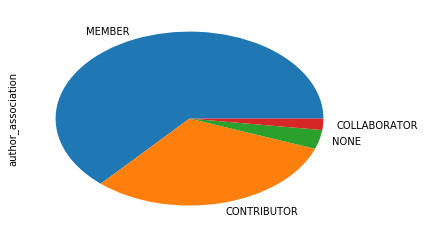

In [185]:
df['author_association'].value_counts().plot.pie();

In [209]:
features = pandas.concat([
    df['merged_at'].lt(pandas.to_datetime('2020-01-01')).rename('merged')
], axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


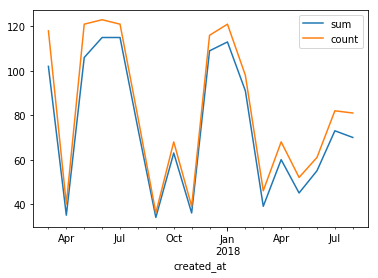

In [218]:
merged = features[['merged']].set_index(df.loc[features.index]['created_at']).groupby(pandas.TimeGrouper('M')).agg(('sum', 'count'))['merged']
merged.plot()

The monthly success rate of merges.

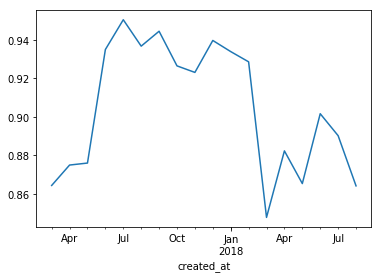

In [222]:
(merged['sum']/merged['count']).plot()

In [223]:
from toolz.curried import *

* The number of opened and closed pull requests.

Days til being closed.

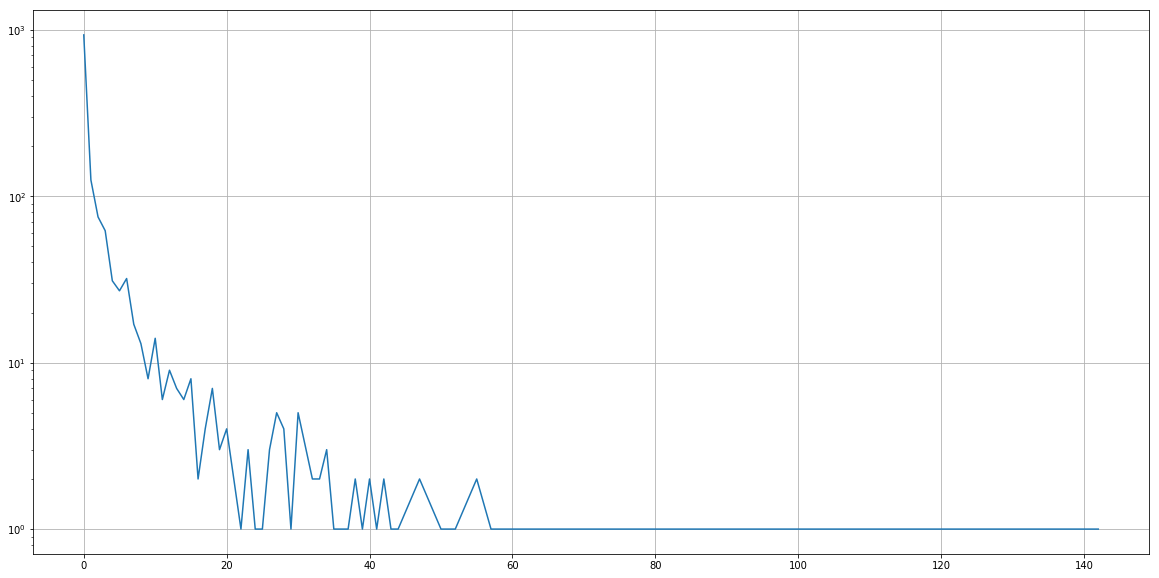

In [271]:
dt = df[['created_at', 'closed_at']]

ct = dt.diff(axis=1)[['closed_at']].set_index(df.loc[dt.index]['created_at'])

ct['closed_at'].apply(lambda x: x.days).value_counts().sort_index().iloc[:-5].plot(logy=True, figsize=(20, 10), grid=True)

In [273]:
g = dt.diff(axis=1)[['closed_at']].set_index(df.loc[dt.index]['created_at']).groupby(
    pandas.Grouper(freq='M')
).describe()['closed_at'].pipe(lambda df: df[[x for x in df.columns if x not in ('max', 'std')]])['mean'].apply(lambda x: x.days)

In [176]:
tags.sum().sort_values(ascending=False).to_frame('labels').T

,type:Bug,type:Maintenance,type:Enhancement,tag:Build System,tag:Documentation,tag:Design and UX,pkg:notebook,tag:Extensions,pkg:apputils,pkg:filebrowser,...,pkg:tooltip,todo:Backport to 0.32.x,pkg:csvviewer,pkg:json,tag:Phosphor,tag:Server Change,pkg:imageviewer,tag:Real Time Collaboration,status:Needs Review,status:Work in Progress
labels,192,96,88,83,67,63,53,37,34,32,...,2,2,2,2,2,1,1,1,1,1


In [128]:
from networkx import *

In [158]:
from matplotlib.pyplot import *

In [131]:
G = from_pandas_adjacency(tags.T @ tags)

In [166]:
number_of_edges(G)

In [166]:
number_of_edges(G)

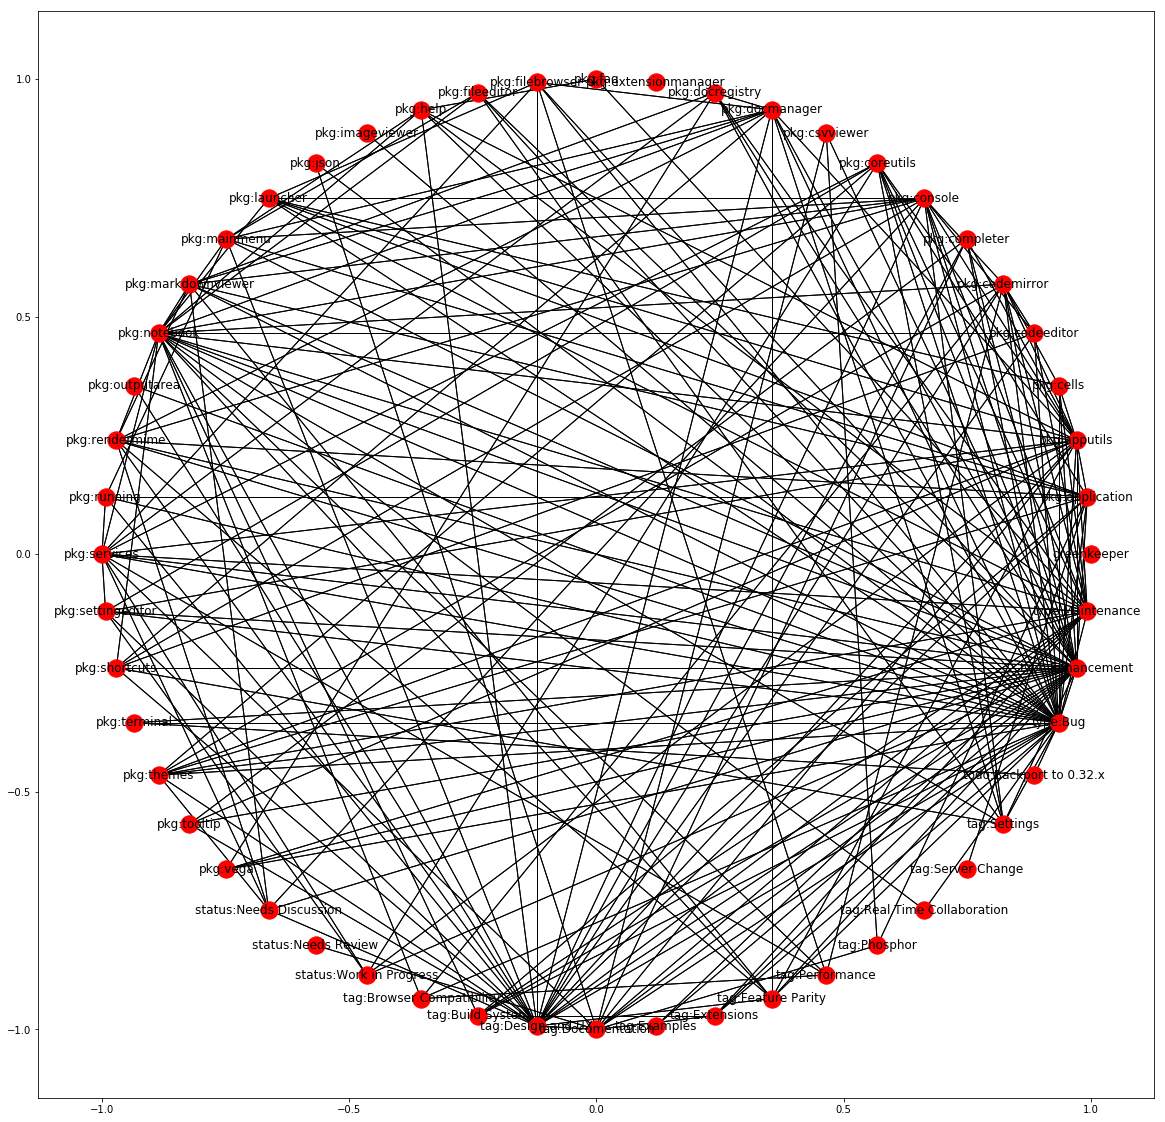

In [167]:
pos = layout.shell_layout(G)

%matplotlib inline
draw_networkx(G, pos)
draw_networkx_edges(G, pos)
gcf().set_size_inches((20, 20))

In [ ]:
f

In [141]:
from graphviz import Source

In [127]:
tags.values.T @ tags.values @ tags.val

array([[  3,   0,   0, ...,   0,   0,   0],
       [  0,  23,   3, ...,   7,   8,   0],
       [  0,   3,  34, ...,  14,   8,   3],
       ...,
       [  0,   7,  14, ..., 192,   1,   2],
       [  0,   8,   8, ...,   1,  88,   0],
       [  0,   0,   3, ...,   2,   0,  96]], dtype=uint8)

In [117]:
tags.apply(compose(count, filter(bool)))

greenkeeper                      3
pkg:application                 23
pkg:apputils                    34
pkg:cells                        6
pkg:codeeditor                   6
pkg:codemirror                  23
pkg:completer                   13
pkg:console                     17
pkg:coreutils                   10
pkg:csvviewer                    2
pkg:docmanager                  16
pkg:docregistry                 16
pkg:extensionmanager             3
pkg:faq                          2
pkg:filebrowser                 32
pkg:fileeditor                  10
pkg:help                         8
pkg:imageviewer                  1
pkg:json                         2
pkg:launcher                    12
pkg:mainmenu                    15
pkg:markdownviewer               7
pkg:notebook                    53
pkg:outputarea                   4
pkg:rendermime                  10
pkg:running                      5
pkg:services                    21
pkg:settingeditor                5
pkg:shortcuts       

In [ ]:
tags

In [114]:
df['labels']

number
5216    [{'id': 601545001, 'node_id': 'MDU6TGFiZWw2MDE...
5204    [{'id': 445427458, 'node_id': 'MDU6TGFiZWw0NDU...
5196                                                   []
5194    [{'id': 494914072, 'node_id': 'MDU6TGFiZWw0OTQ...
5193                                                   []
5186                                                   []
5185    [{'id': 412241733, 'node_id': 'MDU6TGFiZWw0MTI...
5184                                                   []
5180                                                   []
5178    [{'id': 412242775, 'node_id': 'MDU6TGFiZWw0MTI...
5175    [{'id': 412241733, 'node_id': 'MDU6TGFiZWw0MTI...
5174    [{'id': 392845633, 'node_id': 'MDU6TGFiZWwzOTI...
5172    [{'id': 412242775, 'node_id': 'MDU6TGFiZWw0MTI...
5165    [{'id': 445427387, 'node_id': 'MDU6TGFiZWw0NDU...
5162    [{'id': 392845633, 'node_id': 'MDU6TGFiZWwzOTI...
5154    [{'id': 390791434, 'node_id': 'MDU6TGFiZWwzOTA...
5152    [{'id': 412251336, 'node_id': 'MDU6TGFiZWw0MTI...
5151   

In [106]:
tags.sum(axis=1).value_counts().

2    285
1    140
3     91
4     17
6      2
dtype: int64

In [85]:
df.T

number,5216,5204,5196,5194,5193,5186,5185,5184,5180,5178,...,2965,2964,2961,2959,2958,2957,2955,2954,2950,2947
_links,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...,{'self': {'href': 'https://api.github.com/repo...
assignee,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
assignees,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
author_association,CONTRIBUTOR,MEMBER,MEMBER,MEMBER,CONTRIBUTOR,CONTRIBUTOR,MEMBER,CONTRIBUTOR,CONTRIBUTOR,MEMBER,...,MEMBER,CONTRIBUTOR,MEMBER,MEMBER,MEMBER,MEMBER,MEMBER,CONTRIBUTOR,MEMBER,CONTRIBUTOR
base,"{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:saulshanabrook-patch-4',...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...",...,"{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'...","{'label': 'jupyterlab:master', 'ref': 'master'..."
body,@jasongrout @ivanov @ian-r-rose This sets the ...,Fixes #5203.,"While the errors in #5174 were helpful, the ad...",Fixes #5191,Addresses #5179,,,This removes our custom conda installation dir...,Follow up on #5154 and #5034 - actually conver...,,...,This is meant to fix #2845 😃 . Should I be mod...,Updated to help display correctly from missing...,cf #2907.,Potential fix for https://github.com/jupyterla...,Fixes #2918.,Fixes https://github.com/jupyterlab/jupyterlab...,Fixes #2946.,Some question were recurrent at JupyterCon and...,,Allows submitting an entire line to the consol...
closed_at,2018-08-26 20:42:25,2018-08-24 20:10:05,2018-08-24 12:55:59,2018-08-23 12:20:39,2018-08-23 00:20:43,2018-08-22 02:29:12,2018-08-22 16:20:49,2018-08-22 12:33:22,2018-08-21 19:02:40,2018-08-21 21:33:03,...,2017-09-05 21:24:44,2017-09-05 22:01:16,2017-09-06 14:32:52,2017-10-12 15:44:12,2017-09-05 15:33:52,2017-09-06 14:33:27,2017-09-06 14:34:15,2018-01-10 15:19:17,2017-09-01 14:29:39,2017-09-01 14:33:51
comments_url,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.c